In [158]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from MCForecastTools import MCSimulation
%matplotlib inline

In [159]:
#apple_csv = Path("..data/csv_files/Apple.csv")
apple_df = pd.read_csv("../data/clean/Apple.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

facebook_df = pd.read_csv("../data/clean/Facebook.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

google_df = pd.read_csv("../data/clean/Google.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

netflix_df = pd.read_csv("../data/clean/Netflix.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

amazon_df = pd.read_csv("../data/clean/Amazon.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

In [160]:
apple_df.rename(columns={"Close":"AAPL"}, inplace=True)

google_df.rename(columns={"Close":"GOOGL"}, inplace=True)

netflix_df.rename(columns={"Close":"NFLX"}, inplace=True)

facebook_df.rename(columns={"Close":"FB"}, inplace=True)

amazon_df.rename(columns={"Close":"AMZN"}, inplace=True)

In [161]:
apple_df.head()

,AAPL
Date,
2019-10-29,60.82
2019-10-30,60.82
2019-10-31,62.19
2019-11-01,63.96
2019-11-04,64.38


In [162]:
daily_prices = pd.concat([facebook_df, apple_df, amazon_df, netflix_df, google_df], axis="columns", join="inner")

daily_prices.sort_index(inplace=True)
daily_prices.head()

,FB,AAPL,AMZN,NFLX,GOOGL
Date,,,,,
2019-10-29,189.31,60.82,1762.71,281.21,1260.66
2019-10-30,188.25,60.82,1779.99,291.45,1260.70
2019-10-31,191.65,62.19,1776.66,287.41,1258.80
2019-11-01,193.62,63.96,1791.44,286.81,1272.25
2019-11-04,194.72,64.38,1804.66,292.86,1289.61


In [163]:
#daily prices for FAANG Stocks
daily_prices.reset_index()

,Date,FB,AAPL,AMZN,NFLX,GOOGL
0,2019-10-29,189.31,60.82,1762.71,281.21,1260.66
1,2019-10-30,188.25,60.82,1779.99,291.45,1260.70
2,2019-10-31,191.65,62.19,1776.66,287.41,1258.80
3,2019-11-01,193.62,63.96,1791.44,286.81,1272.25
4,2019-11-04,194.72,64.38,1804.66,292.86,1289.61
...,...,...,...,...,...,...
248,2020-10-22,278.12,115.75,3176.40,485.23,1606.66
249,2020-10-23,284.79,115.04,3204.40,488.28,1632.98
250,2020-10-26,277.11,115.05,3207.04,488.24,1584.29
251,2020-10-27,283.29,116.60,3286.33,488.93,1598.88


In [164]:
#Changing Prices to Daily Return Changes
daily_price_change = daily_prices.pct_change()
changes_daily_prices = daily_price_change.dropna()
changes_daily_prices.head()

,FB,AAPL,AMZN,NFLX,GOOGL
Date,,,,,
2019-10-30,-0.005599,0.000000,0.009803,0.036414,0.000032
2019-10-31,0.018061,0.022525,-0.001871,-0.013862,-0.001507
2019-11-01,0.010279,0.028461,0.008319,-0.002088,0.010685
2019-11-04,0.005681,0.006567,0.007380,0.021094,0.013645
2019-11-05,-0.002054,-0.001553,-0.001635,-0.016493,0.001419


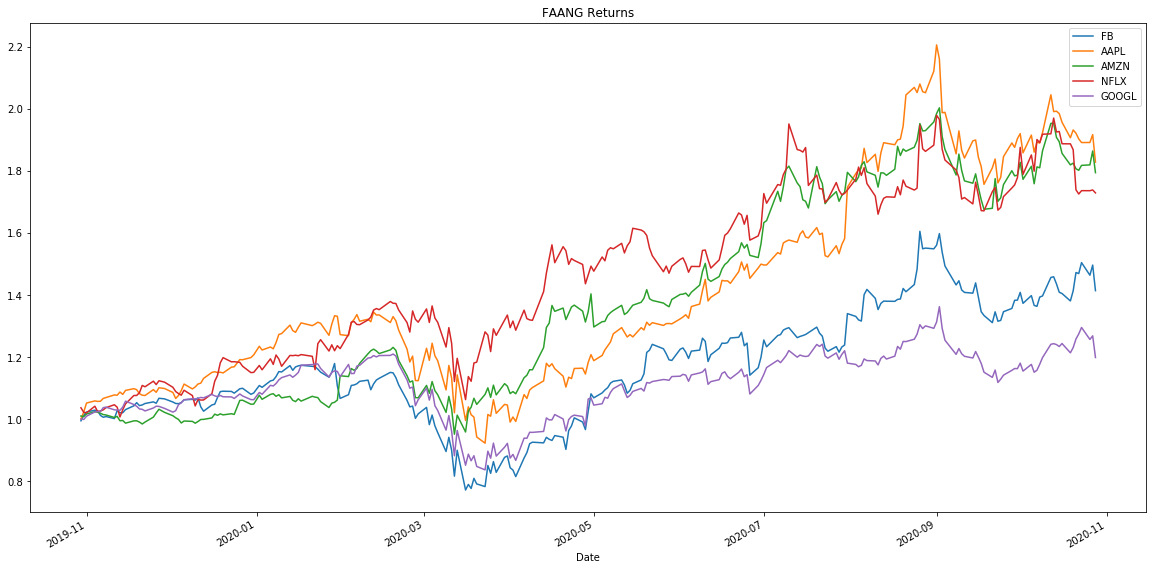

In [165]:
returns_faang = (1 + changes_daily_prices).cumprod()
returns_faang.plot(figsize = (20,10), title="FAANG Returns")

In [166]:
standard_dev = returns_faang.std()
standard_dev

FB       0.184986
AAPL     0.326597
AMZN     0.329905
NFLX     0.275714
GOOGL    0.102088
dtype: float64

In [167]:
annual_sd = standard_dev * np.sqrt(252)
annual_sd

FB       2.936568
AAPL     5.184569
AMZN     5.237081
NFLX     4.376824
GOOGL    1.620593
dtype: float64

In [168]:
weights = [.2, .2, .2, .2, .2]

portfolio_returns = returns_faang.dot(weights)

portfolio_returns.head()

Date
2019-10-30    1.008130
2019-10-31    1.012674
2019-11-01    1.023960
2019-11-04    1.035060
2019-11-05    1.030829
dtype: float64

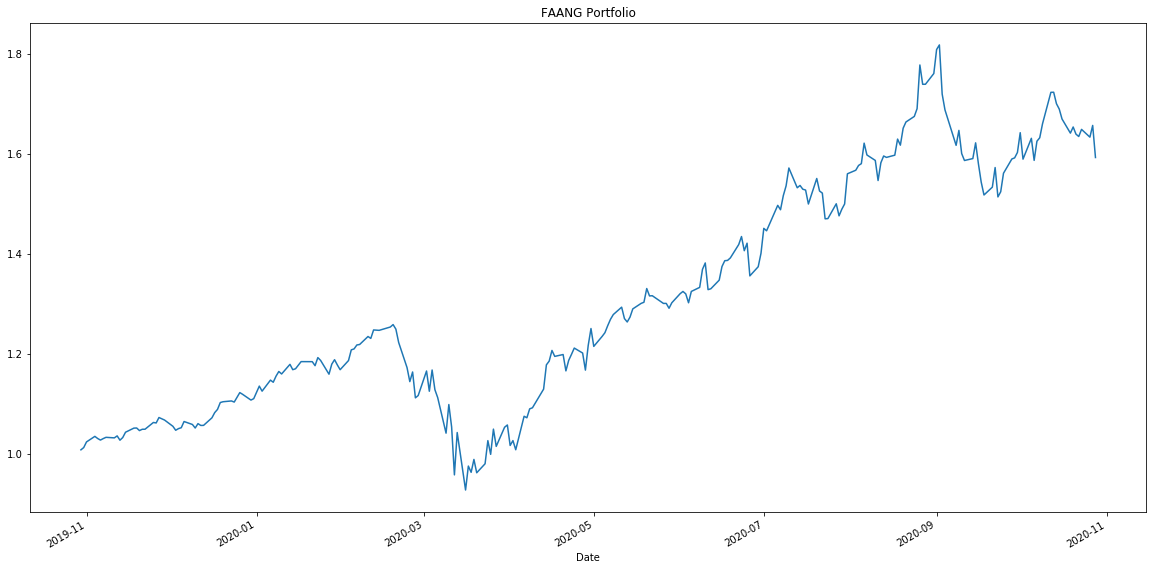

In [169]:
portfolio_returns.plot(figsize = (20,10), title="FAANG Portfolio")

In [170]:
faang_df = pd.DataFrame(portfolio_returns, columns=["FAANG"])



In [171]:
faang_price_changes = faang_df.pct_change()

faang_asset = faang_price_changes.dropna()

faang_asset.head()

,FAANG
Date,
2019-10-31,0.004508
2019-11-01,0.011144
2019-11-04,0.010840
2019-11-05,-0.004088
2019-11-06,-0.003077


In [172]:
faang_asset.to_csv("../data/clean/FAANG.csv")

# Play around with Data

In [320]:
bitcoin_path = ("../Data/clean/Bitcoin.csv")
gold_path = ("../Data/clean/Gold.csv")
vnq_path = ("../Data/clean/VNQ.csv")
sp500_path = ("../Data/clean/sp500.csv")
faang_path = ("../Data/clean/FAANG.csv")

In [321]:
bitcoin_df = pd.read_csv(bitcoin_path)
gold_df = pd.read_csv(gold_path)
vnq_df = pd.read_csv(vnq_path)
sp500_df = pd.read_csv(sp500_path)
faang_df = pd.read_csv(faang_path)

In [322]:
faang_df

,Date,FAANG
0,2019-10-31,0.004508
1,2019-11-01,0.011144
2,2019-11-04,0.010840
3,2019-11-05,-0.004088
4,2019-11-06,-0.003077
...,...,...
246,2020-10-22,-0.002887
247,2020-10-23,0.008706
248,2020-10-26,-0.009420
249,2020-10-27,0.014342


In [352]:
new_assets = pd.concat([gold_df, sp500_df, vnq_df, bitcoin_df], axis=1, join= "inner")
new_assets

Cols = list(new_assets.columns)

for i, item in enumerate(new_assets.columns):
    if item in new_assets.columns[:i]:Cols[i] = "toDROP"

new_assets.columns = Cols

joining_assets = new_assets.drop("toDROP", 1).set_index("Date").dropna()

joining_assets

,GOLD,sp500,VNQ,BITCOIN
Date,,,,
2020-10-29,1868.65,3310.11,94.13,9411.3
2020-10-28,1879.20,3271.03,94.47,9157.9
2020-10-27,1911.90,3390.68,94.30,9152.6
2020-10-26,1905.70,3400.97,94.28,9230.1
2020-10-23,1905.20,3465.39,93.62,9300.6
...,...,...,...,...
2019-10-18,1523.00,2940.25,80.36,10908.5
2019-10-17,1527.80,2976.74,79.21,11105.9
2019-10-16,1523.40,2961.79,77.94,11096.2


In [353]:
joining_assets.sort_values(by=["Date"], inplace=True, ascending=True)


In [354]:
no_bitcoin_assets = joining_assets.pct_change().dropna()
no_bitcoin_assets

,GOLD,sp500,VNQ,BITCOIN
Date,,,,
2019-10-15,-0.009168,-0.002429,-0.013230,-0.039795
2019-10-16,0.006807,-0.005316,0.024448,-0.020929
2019-10-17,0.002888,0.005048,0.016295,0.000874
2019-10-18,-0.003142,-0.012258,0.014518,-0.017774
2019-10-21,-0.003743,-0.017903,-0.005973,0.010478
...,...,...,...,...
2020-10-23,0.000315,0.003446,0.017277,0.011122
2020-10-26,0.000262,-0.018590,0.007050,-0.007580
2020-10-27,0.003253,-0.003026,0.000212,-0.008396


In [355]:
no_bitcoin_assets.reset_index()

,Date,GOLD,sp500,VNQ,BITCOIN
0,2019-10-15,-0.009168,-0.002429,-0.013230,-0.039795
1,2019-10-16,0.006807,-0.005316,0.024448,-0.020929
2,2019-10-17,0.002888,0.005048,0.016295,0.000874
3,2019-10-18,-0.003142,-0.012258,0.014518,-0.017774
4,2019-10-21,-0.003743,-0.017903,-0.005973,0.010478
...,...,...,...,...,...
272,2020-10-23,0.000315,0.003446,0.017277,0.011122
273,2020-10-26,0.000262,-0.018590,0.007050,-0.007580
274,2020-10-27,0.003253,-0.003026,0.000212,-0.008396
275,2020-10-28,-0.017103,-0.035288,0.001803,0.000579


In [356]:
no_bitcoin_assets.head(15)

,GOLD,sp500,VNQ,BITCOIN
Date,,,,
2019-10-15,-0.009168,-0.002429,-0.013230,-0.039795
2019-10-16,0.006807,-0.005316,0.024448,-0.020929
2019-10-17,0.002888,0.005048,0.016295,0.000874
2019-10-18,-0.003142,-0.012258,0.014518,-0.017774
2019-10-21,-0.003743,-0.017903,-0.005973,0.010478
2019-10-22,-0.000461,0.007972,0.000125,-0.098913
2019-10-23,0.005473,0.014217,0.003004,-0.022995
2019-10-24,0.005902,-0.004478,-0.007113,-0.016251
2019-10-25,0.000782,-0.015561,0.015837,0.005573


In [357]:
try1_assets = no_bitcoin_assets.drop(no_bitcoin_assets.index[[0,1,2,3,4,5,6,7,8,9,10,11]])

In [358]:
try1_assets

,GOLD,sp500,VNQ,BITCOIN
Date,,,,
2019-10-31,0.011464,-0.001387,0.017443,0.004977
2019-11-01,-0.001749,0.009956,-0.004676,-0.004105
2019-11-04,0.000195,-0.002000,0.000000,-0.001570
2019-11-05,-0.017579,0.002763,0.003975,-0.002239
2019-11-06,0.006207,-0.003919,-0.016437,0.006940
...,...,...,...,...
2020-10-23,0.000315,0.003446,0.017277,0.011122
2020-10-26,0.000262,-0.018590,0.007050,-0.007580
2020-10-27,0.003253,-0.003026,0.000212,-0.008396


In [359]:
assets_class = try1_assets.reset_index()

In [360]:
assets_class

,Date,GOLD,sp500,VNQ,BITCOIN
0,2019-10-31,0.011464,-0.001387,0.017443,0.004977
1,2019-11-01,-0.001749,0.009956,-0.004676,-0.004105
2,2019-11-04,0.000195,-0.002000,0.000000,-0.001570
3,2019-11-05,-0.017579,0.002763,0.003975,-0.002239
4,2019-11-06,0.006207,-0.003919,-0.016437,0.006940
...,...,...,...,...,...
260,2020-10-23,0.000315,0.003446,0.017277,0.011122
261,2020-10-26,0.000262,-0.018590,0.007050,-0.007580
262,2020-10-27,0.003253,-0.003026,0.000212,-0.008396
263,2020-10-28,-0.017103,-0.035288,0.001803,0.000579


In [361]:
merge_assets = pd.concat([assets_class, faang_df], axis= "columns", join="inner")


In [362]:
merge_assets

,Date,GOLD,sp500,VNQ,BITCOIN,Date,FAANG
0,2019-10-31,0.011464,-0.001387,0.017443,0.004977,2019-10-31,0.004508
1,2019-11-01,-0.001749,0.009956,-0.004676,-0.004105,2019-11-01,0.011144
2,2019-11-04,0.000195,-0.002000,0.000000,-0.001570,2019-11-04,0.010840
3,2019-11-05,-0.017579,0.002763,0.003975,-0.002239,2019-11-05,-0.004088
4,2019-11-06,0.006207,-0.003919,-0.016437,0.006940,2019-11-06,-0.003077
...,...,...,...,...,...,...,...
246,2020-10-05,0.006553,0.017976,-0.003158,-0.001469,2020-10-22,-0.002887
247,2020-10-06,-0.005885,-0.013988,0.003714,-0.002471,2020-10-23,0.008706
248,2020-10-07,-0.009430,0.017406,0.014256,0.021814,2020-10-26,-0.009420
249,2020-10-08,0.002274,0.008007,0.000536,0.014074,2020-10-27,0.014342


In [363]:
Cols = list(merge_assets.columns)

for i, item in enumerate(merge_assets.columns):
    if item in merge_assets.columns[:i]:Cols[i] = "toDROP"

merge_assets.columns = Cols

assets_excluding_bitcoin = merge_assets.drop("toDROP", 1).set_index("Date").dropna()

assets_excluding_bitcoin

,GOLD,sp500,VNQ,BITCOIN,FAANG
Date,,,,,
2019-10-31,0.011464,-0.001387,0.017443,0.004977,0.004508
2019-11-01,-0.001749,0.009956,-0.004676,-0.004105,0.011144
2019-11-04,0.000195,-0.002000,0.000000,-0.001570,0.010840
2019-11-05,-0.017579,0.002763,0.003975,-0.002239,-0.004088
2019-11-06,0.006207,-0.003919,-0.016437,0.006940,-0.003077
...,...,...,...,...,...
2020-10-05,0.006553,0.017976,-0.003158,-0.001469,-0.002887
2020-10-06,-0.005885,-0.013988,0.003714,-0.002471,0.008706
2020-10-07,-0.009430,0.017406,0.014256,0.021814,-0.009420


In [364]:
assets_excluding_bitcoin.to_csv("../data/clean/4Assets.csv")

In [365]:
clean_assets = pd.merge(assets_class, faang_df, how="right", on="Date")
clean_assets

,Date,GOLD,sp500,VNQ,BITCOIN,FAANG
0,2019-10-31,0.011464,-0.001387,0.017443,0.004977,0.004508
1,2019-11-01,-0.001749,0.009956,-0.004676,-0.004105,0.011144
2,2019-11-04,0.000195,-0.002000,0.000000,-0.001570,0.010840
3,2019-11-05,-0.017579,0.002763,0.003975,-0.002239,-0.004088
4,2019-11-06,0.006207,-0.003919,-0.016437,0.006940,-0.003077
...,...,...,...,...,...,...
246,2020-10-22,-0.012905,0.005219,-0.002168,-0.021083,-0.002887
247,2020-10-23,0.000315,0.003446,0.017277,0.011122,0.008706
248,2020-10-26,0.000262,-0.018590,0.007050,-0.007580,-0.009420
249,2020-10-27,0.003253,-0.003026,0.000212,-0.008396,0.014342


In [394]:
clean_assets.to_csv("../data/clean/Five_Assets.csv")

In [395]:
asset_changes_daily = pd.DataFrame(clean_assets)

In [396]:
asset_changes_daily

,GOLD,sp500,VNQ,BITCOIN,FAANG
Date,,,,,
2019-10-31,0.011464,-0.001387,0.017443,0.004977,0.004508
2019-11-01,-0.001749,0.009956,-0.004676,-0.004105,0.011144
2019-11-04,0.000195,-0.002000,0.000000,-0.001570,0.010840
2019-11-05,-0.017579,0.002763,0.003975,-0.002239,-0.004088
2019-11-06,0.006207,-0.003919,-0.016437,0.006940,-0.003077
...,...,...,...,...,...
2020-10-22,-0.012905,0.005219,-0.002168,-0.021083,-0.002887
2020-10-23,0.000315,0.003446,0.017277,0.011122,0.008706
2020-10-26,0.000262,-0.018590,0.007050,-0.007580,-0.009420


In [397]:
asset_returns = (1 + asset_changes_daily).cumprod()
asset_returns

,GOLD,sp500,VNQ,BITCOIN,FAANG
Date,,,,,
2019-10-31,1.011464,0.998613,1.017443,1.004977,1.004508
2019-11-01,1.009695,1.008555,1.012686,1.000851,1.015703
2019-11-04,1.009892,1.006538,1.012686,0.999280,1.026713
2019-11-05,0.992139,1.009319,1.016711,0.997042,1.022516
2019-11-06,0.998297,1.005363,1.000000,1.003962,1.019370
...,...,...,...,...,...
2020-10-22,1.410070,1.126480,1.289656,0.916246,1.621665
2020-10-23,1.410515,1.130362,1.311938,0.926436,1.635784
2020-10-26,1.410885,1.109349,1.321187,0.919414,1.620375


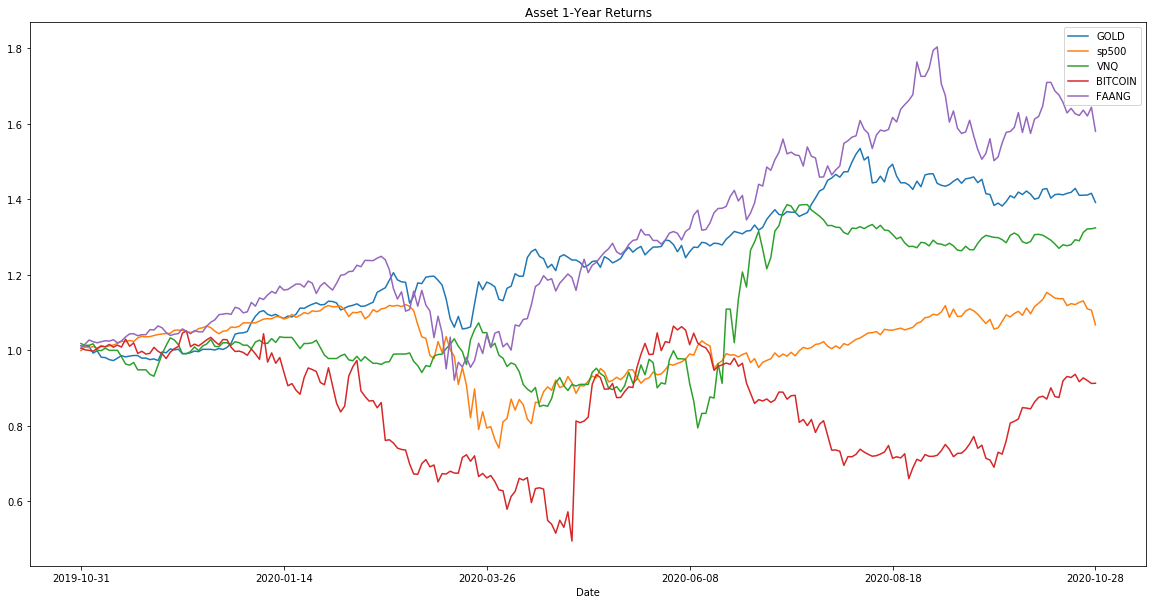

In [398]:
asset_returns.plot(figsize = (20,10), title="Asset 1-Year Returns")